In [1]:
import pandas as pd
import numpy as np
import os
import re
import openpyxl
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score
import random
random.seed(5)

In [2]:

df = pd.read_csv('Desktop/bank-additional-full.csv', index_col = 0, delimiter = ';')

In [3]:
df.head(10)

,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,,,,,,,,,,,,,,,,,,,,
56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
port1 = pd.DataFrame(data=df)

In [5]:
port1.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,,,,,,,,,,,,,,,,,,,,
56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
port1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41188 entries, 56 to 74
Data columns (total 20 columns):
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(4), object(11)
memory usage: 6.6+ MB


In [7]:
print(port1.default.unique())
print(port1.loan.unique())
print(port1.y.unique()) #yes binarize but this is the target column
print(port1.marital.unique())  # don't binarize
print(port1.housing.unique()) # maybe get rid of the unknown rows?
print(port1.previous.unique())  # don't binarize

['no' 'unknown' 'yes']
['no' 'yes' 'unknown']
['no' 'yes']
['married' 'single' 'divorced' 'unknown']
['no' 'yes' 'unknown']
[0 1 2 3 4 5 6 7]


In [8]:
print(port1['default'].value_counts())
print(port1['loan'].value_counts())
print(port1['marital'].value_counts())
print(port1['housing'].value_counts())

no         32588
unknown     8597
yes            3
Name: default, dtype: int64
no         33950
yes         6248
unknown      990
Name: loan, dtype: int64
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
yes        21576
no         18622
unknown      990
Name: housing, dtype: int64


In [9]:
port2 = port1[(port1[['default','loan','marital','housing']] != 'unknown').all(axis=1)]
port2.info()
#lose around 10k rows

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31760 entries, 56 to 74
Data columns (total 20 columns):
job               31760 non-null object
marital           31760 non-null object
education         31760 non-null object
default           31760 non-null object
housing           31760 non-null object
loan              31760 non-null object
contact           31760 non-null object
month             31760 non-null object
day_of_week       31760 non-null object
duration          31760 non-null int64
campaign          31760 non-null int64
pdays             31760 non-null int64
previous          31760 non-null int64
poutcome          31760 non-null object
emp.var.rate      31760 non-null float64
cons.price.idx    31760 non-null float64
cons.conf.idx     31760 non-null float64
euribor3m         31760 non-null float64
nr.employed       31760 non-null float64
y                 31760 non-null object
dtypes: float64(5), int64(4), object(11)
memory usage: 5.1+ MB


In [10]:
port2['default_binarized'] = port2['default'].map({'no': 0, 'yes':1})
port2['housing_binarized'] = port2['housing'].map({'no': 0, 'yes':1})
port2['loan_binarized'] = port2['loan'].map({'no': 0, 'yes':1})

C:\Users\Saaawan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Saaawan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Saaawan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [11]:
port2['deposit'] = port2['y'].map({'no':0, 'yes':1})
port2.head(10)

C:\Users\Saaawan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,...,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,default_binarized,housing_binarized,loan_binarized,deposit
age,,,,,,,,,,,,,,,,,,,,,
56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,...,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0
37,services,married,high.school,no,yes,no,telephone,may,mon,226,...,1.1,93.994,-36.4,4.857,5191.0,no,0,1,0,0
40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,...,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0
56,services,married,high.school,no,no,yes,telephone,may,mon,307,...,1.1,93.994,-36.4,4.857,5191.0,no,0,0,1,0
59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,...,1.1,93.994,-36.4,4.857,5191.0,no,0,0,0,0
24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,...,1.1,93.994,-36.4,4.857,5191.0,no,0,1,0,0
25,services,single,high.school,no,yes,no,telephone,may,mon,50,...,1.1,93.994,-36.4,4.857,5191.0,no,0,1,0,0
25,services,single,high.school,no,yes,no,telephone,may,mon,222,...,1.1,93.994,-36.4,4.857,5191.0,no,0,1,0,0
29,blue-collar,single,high.school,no,no,yes,telephone,may,mon,137,...,1.1,93.994,-36.4,4.857,5191.0,no,0,0,1,0


In [12]:
#Drop the old versions of the binary columns
port3 = port2.drop(['y', 'default', 'housing', 'loan'], axis=1)

In [14]:
port3.head(10)

,job,marital,education,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,default_binarized,housing_binarized,loan_binarized,deposit
age,,,,,,,,,,,,,,,,,,,,
56,housemaid,married,basic.4y,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0
37,services,married,high.school,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0
40,admin.,married,basic.6y,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0
56,services,married,high.school,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0
59,admin.,married,professional.course,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0
24,technician,single,professional.course,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0
25,services,single,high.school,telephone,may,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0
25,services,single,high.school,telephone,may,mon,222,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,1,0,0
29,blue-collar,single,high.school,telephone,may,mon,137,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0


In [15]:
port3['deposit'].value_counts()

0    27671
1     4089
Name: deposit, dtype: int64

In [16]:
#we will likely need to do something to balance the data.
port4 = pd.get_dummies(port3)
port4.head(10)
y = port4['deposit']
y.value_counts()

0    27671
1     4089
Name: deposit, dtype: int64

In [17]:
port5 = port4.drop(['deposit'], axis = 1, inplace = False)
scaler = StandardScaler()
scaled_df = scaler.fit_transform(port5)

In [18]:
scaled_df = pd.DataFrame(scaled_df, columns = port5.columns )

In [19]:
scaled_df.info()
#31,760
#y.value_counts()
#31,760

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31760 entries, 0 to 31759
Data columns (total 55 columns):
duration                         31760 non-null float64
campaign                         31760 non-null float64
pdays                            31760 non-null float64
previous                         31760 non-null float64
emp.var.rate                     31760 non-null float64
cons.price.idx                   31760 non-null float64
cons.conf.idx                    31760 non-null float64
euribor3m                        31760 non-null float64
nr.employed                      31760 non-null float64
default_binarized                31760 non-null float64
housing_binarized                31760 non-null float64
loan_binarized                   31760 non-null float64
job_admin.                       31760 non-null float64
job_blue-collar                  31760 non-null float64
job_entrepreneur                 31760 non-null float64
job_housemaid                    31760 non-null flo

In [20]:
x_train, x_test, y_train, y_test = train_test_split(scaled_df, y, test_size=0.3, random_state=42)
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22232 entries, 7546 to 23654
Data columns (total 55 columns):
duration                         22232 non-null float64
campaign                         22232 non-null float64
pdays                            22232 non-null float64
previous                         22232 non-null float64
emp.var.rate                     22232 non-null float64
cons.price.idx                   22232 non-null float64
cons.conf.idx                    22232 non-null float64
euribor3m                        22232 non-null float64
nr.employed                      22232 non-null float64
default_binarized                22232 non-null float64
housing_binarized                22232 non-null float64
loan_binarized                   22232 non-null float64
job_admin.                       22232 non-null float64
job_blue-collar                  22232 non-null float64
job_entrepreneur                 22232 non-null float64
job_housemaid                    22232 non-null 

In [22]:
#Building the RF model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)

In [23]:
#To test the hyperparameters I am going to tune a bunch

from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 25)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [24]:
#DO NOT RE RUN THIS IT TAKES A COUPLE HOURS

#SKIP DOWN A FEW AND IF NEED BE, USE THE BEST VERSION OF MODEL THAT IS MENTIONED BELOW



#rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
#rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3)
# Fit the random search model
#rf_random.fit(x_train, y_train)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=None,
          param_distributions={'n_estimators': [100, 137, 175, 212, 250, 287, 325, 362, 400, 437, 475, 512, 550, 587, 625, 662, 700, 737, 775, 812, 850, 887, 925, 962, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='wa

In [25]:
#Find the best parameters
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}

In [41]:
rf2 = RandomForestRegressor(n_estimators = 700, min_samples_split = 5, min_samples_leaf = 2, max_features = 'auto', max_depth = 10, bootstrap = 'True')
rf2.fit(x_train, y_train)

RandomForestRegressor(bootstrap='True', criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=2, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=700, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [59]:
y_pred = rf2.predict(x_train)

In [67]:
y_pred = np.where(y_pred < 0.5, 0, 1)

In [68]:
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [70]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_train, y_pred)
print('Confusion Matrix:\n',cnf_matrix)

Confusion Matrix:
 [[19065   303]
 [  772  2092]]


In [71]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_train, y_pred)
auc = roc_auc_score(y_train, y_pred)
print('AUC: %.3f' % auc)

AUC: 0.857


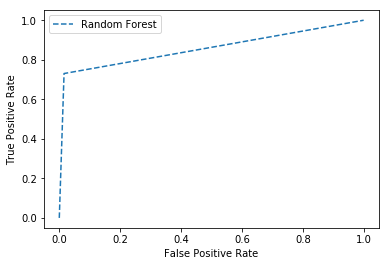

In [73]:
ns_fpr, ns_tpr, _ = roc_curve(y_train, y_pred)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Forest')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [74]:
#OK going to check on the test set
y_pred_test = rf2.predict(x_test)

In [75]:
y_pred_test = np.where(y_pred_test < 0.5, 0, 1)

In [76]:
cnf_matrix = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix:\n',cnf_matrix)

Confusion Matrix:
 [[7942  361]
 [ 511  714]]


In [78]:
fpr, tpr, thresholds = roc_curve(y_train, y_pred)
auc = roc_auc_score(y_test, y_pred_test)
print('AUC: %.3f' % auc)

#0.770 AUC so a little overfitting but not terrible

AUC: 0.770


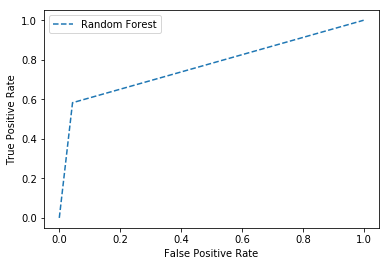

In [79]:
ns_fpr, ns_tpr, _ = roc_curve(y_test, y_pred_test)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Random Forest')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [82]:
accuracy_score1 = accuracy_score(y_train, y_pred, normalize = True)
accuracy_score1

0.951646275638719

In [83]:
accuracy_score2 = accuracy_score(y_test, y_pred_test, normalize = True)
accuracy_score2

0.90848026868178

In [59]:
#Import xg boost classes
from xgboost.sklearn import XGBClassifier
from xgboost.sklearn import XGBRegressor

In [60]:
import xgboost as xgb

In [61]:
#create a vanilla xgboost classifier to get a basic xgboost model up and running
clf = xgb.XGBClassifier()
clf.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [62]:
#create a prediction set from the training set
y_pred_xgb = clf.predict(x_train)

In [63]:
#create confusion matrix for training data
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_train, y_pred_xgb)
print('Confusion Matrix:\n',cnf_matrix)

Confusion Matrix:
 [[18694   674]
 [ 1302  1562]]


In [64]:
#create ROC for training set
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_train, y_pred_xgb)
auc = roc_auc_score(y_train, y_pred_xgb)
print('AUC: %.3f' % auc)

AUC: 0.755


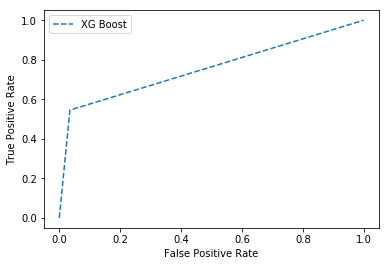

In [65]:
ns_fpr, ns_tpr, _ = roc_curve(y_train, y_pred_xgb)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='XG Boost')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [66]:
#create prediction for the test set and retrieve confusion matrix/ROC
y_pred_test_xgb = clf.predict(x_test)

In [67]:
y_pred_test_xgb = np.where(y_pred_test < 0.5, 0, 1)

In [68]:
cnf_matrix = confusion_matrix(y_test, y_pred_test_xgb)
print('Confusion Matrix:\n',cnf_matrix)

Confusion Matrix:
 [[8000  303]
 [ 564  661]]


In [69]:
fpr, tpr, thresholds = roc_curve(y_train, y_pred)
auc = roc_auc_score(y_test, y_pred_test_xgb)
print('AUC: %.3f' % auc)


AUC: 0.752


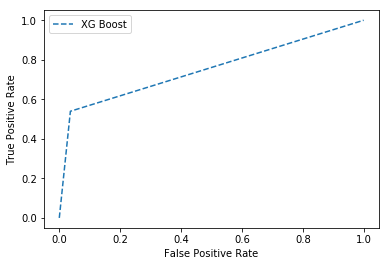

In [70]:
ns_fpr, ns_tpr, _ = roc_curve(y_test, y_pred_test_xgb)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='XG Boost')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [71]:
# create preliminary parameter grid settings
param_grid = {
    "learning_rate": [0.1],
    'max_depth': [6],
    'min_child_weight': [10],
    'subsample': [ 0.7],
    'n_estimators': [5, 30, 100, 250],
}

In [72]:
# import grid search 
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

In [73]:
# create a tuned xgboost using the grid sttings
grid_clf = GridSearchCV(clf, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_clf.fit(x_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'learning_rate': [0.1], 'max_depth': [6], 'min_child_weight': [10], 'subsample': [0.7], 'n_estimators': [5, 30, 100, 250]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [74]:
best_parameters = grid_clf.best_params_

In [75]:
# output best parameters 
print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

Grid Search found the following optimal parameters: 
learning_rate: 0.1
max_depth: 6
min_child_weight: 10
n_estimators: 100
subsample: 0.7


In [76]:
# using training and test set for prediction
training_preds = grid_clf.predict(x_train)
val_preds = grid_clf.predict(x_test)
training_accuracy = accuracy_score(y_train, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)

In [77]:
# create training and validation accuray rate
print("")
print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))


Training Accuracy: 92.43%
Validation accuracy: 90.89%


In [78]:
# create prediction set and evalution metrics
y_pred_test_grid = grid_clf.predict(x_test)

In [79]:
y_pred_test_grid = np.where(y_pred_test_grid < 0.5, 0, 1)

In [80]:
cnf_matrix = confusion_matrix(y_test, y_pred_test_grid)
print('Confusion Matrix:\n',cnf_matrix)

Confusion Matrix:
 [[7974  329]
 [ 539  686]]


In [81]:
fpr, tpr, thresholds = roc_curve(y_train, y_pred)
auc = roc_auc_score(y_test, y_pred_test_grid)
print('AUC: %.3f' % auc)

AUC: 0.760


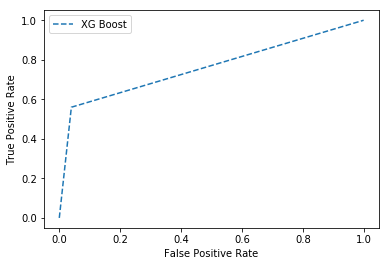

In [82]:
ns_fpr, ns_tpr, _ = roc_curve(y_test, y_pred_test_grid)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='XG Boost')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [83]:
#report accuracy score for orignial vanilla model
accuracy_score1 = accuracy_score(y_train, y_pred_xgb, normalize = True)
accuracy_score1

0.9111191075926592

In [84]:
#report accuracy score for best parameters models
accuracy_score2 = accuracy_score(y_test, y_pred_test_grid, normalize = True)
accuracy_score2

0.9089000839630562